# Grilling

## Decision Trees

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

https://en.wikipedia.org/wiki/Decision_tree

                                      Chillin with some grillin?
                                         Is it cloudy today?
                                            (Root Node)
                                                /\
                                           yes /  \ no
                                              /    \
                                         chance    grillin
                                        of rain?      
                                            /\
                                       yes /  \ no
                                          /    \
                                  no grillin     grillin
                                   

### Decision Tree Terms

* Root Node: Represents our population from which two or more subsets are divided up
* Decision Node: Sub-nodes divided into more sub-nodes based on a decision
* Splitting: dividing a node into sub-nodes
* Leaf / Terminal Node: Node with no children or sub-nodes
* Branch: A section of a decision tree
* Pruning: Eliminating branches and nodes
* Parent / Children: The relationship between nodes and their sub-nodes

## Grillin

We want to decide if our neighbor is going to grill outside today? This decision is based on several factors listed below. Given a condition, we want to see if our neighbor will grill outside. Here are the factors:

**forecast**
* sunny
* overcast
* rainy

**worked**
* yes
* no

**wind**
* high
* normal

**grilled**
* yes
* no

We've collected data for 30 days now and arranged our data into the following tables. For example, when it was sunny, there were 10 days that our neighbor grilled and 2 days our neighbor didn't grilled.

**Data Collection**
* ocast	worked	high	yes
* sunny	worked	norm	yes
* sunny	dayoff	high	no
* ocast	dayoff	norm	no
* ocast	worked	norm	no
* sunny	worked	norm	yes
* sunny	worked	high	yes
* sunny	worked	norm	yes
* ocast	worked	norm	no
* sunny	dayoff	norm	yes
* ocast	dayoff	high	no
* sunny	worked	high	no
* sunny	worked	high	no
* sunny	worked	norm	yes
* ocast	worked	high	yes
* rainy	worked	norm	no
* sunny	dayoff	norm	yes
* sunny	dayoff	norm	yes
* ocast	dayoff	high	no
* sunny	worked	norm	yes
* sunny	worked	norm	yes
* ocast	worked	norm	yes
* ocast	worked	high	no
* ocast	dayoff	high	yes
* rainy	dayoff	norm	no
* sunny	worked	high	no
* rainy	worked	high	no
* rainy	worked	norm	no
* sunny	worked	high	yes
* sunny	worked	high	yes

<pre>

<strong>forecast</strong>


              grilled
          |  yes  |  no
_____________________________

sunny     |   12  |  4
_____________________________

overcast  |   4   |  6
_____________________________

rainy     |   0   |  4
_____________________________

total     |   16  |  14  |  30


<strong>worked</strong>

              grilled
          |  yes  |  no
_____________________________

yes       |   12  |  9
_____________________________

no        |   4   |  5
_____________________________

total     |   16  |  14  |  30


<strong>wind</strong>

              grilled
           |  yes  |  no
_____________________________

high       |   6   |  8
_____________________________

normal     |   10  |  6
_____________________________

total      |   16  |  14  |  30


<strong>grilled</strong>

              grilled
          |  yes  |  no
_____________________________

total     |   16  |  14  |  30

</pre>

Today is sunny, our neighbor worked, and wind is normal. Will our neighbor grill?

Organize the data based on today:

grilled = yes
* Sunny = 12 out of 16 times
* Worked = 12 out of 21 times
* Norm Wind = 10 out of 16 times
* Grilled = 16 out of 30 times

grilled = no
* Sunny = 4 out of 16 times
* Worked = 9 out of 21 times
* Norm Wind = 6 out of 16 times
* Grilled = 14 out of 30 times

### Go to Excel and PowerPoint

Bayes' Approach:

$P(A|B) = \large{\frac{P(A)P(B|A)}{P(B)}}$<br />
where<br />
$P(B) = (P(A) * P(B|A)) + (P(\overline{A}) * P(B|\overline{A}))$

Our question: What is the probability of grilling given today

day = sunny, worked, and normal wind

Some definitions:
* $P(A)$: Grilled
* $P(\overline{A})$: Not grilled
* $P(B|A)$: Grilled on that day
* $P(B|\overline{A})$: Did not grill on that day
* $P(B)$: All the days we obeserved

Here's a solution for $P(B)$

today = sunny, worked, and normal wind

P(grilled) * P(yes|today):<br />
P(16/30) * P(12/16 * 12/21 * 10/16)

P(not grilled) * P(no|today):<br />
P(14/30) * P(4/16 * 9/21 * 6/16)

P(B) = (P(grilled) * P(yes|today)) + (P(not grilled) * P(no|today)) = ??%

$\large{\frac{P(willGrill) * P(yes|today)}{P(allOurDays)}}$ = $\large{\frac{0.143}{0.162}}$ is about 88%

$\large{\frac{P(willNotGrill) * P(no|today)}{P(allOurDays)}}$ = $\large{\frac{0.019}{0.162}}$ is about 12%

Today is sunny, our neighbor worked, and wind is normal. Will our neighbor be grilling?

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/DSChunks/main/grillin.csv', sep='\t')
df.head()

,forecast,worked,wind,grilled
0,ocast,worked,high,yes
1,sunny,worked,norm,yes
2,sunny,dayoff,high,no
3,ocast,dayoff,norm,no
4,ocast,worked,norm,no


   forecast_rainy  forecast_sunny  worked_worked  wind_norm
0           False           False           True      False
1           False            True           True       True
2           False            True          False      False
3           False           False          False       True
4           False           False           True       True
0    1
1    1
2    0
3    0
4    0
Name: grilled, dtype: int64


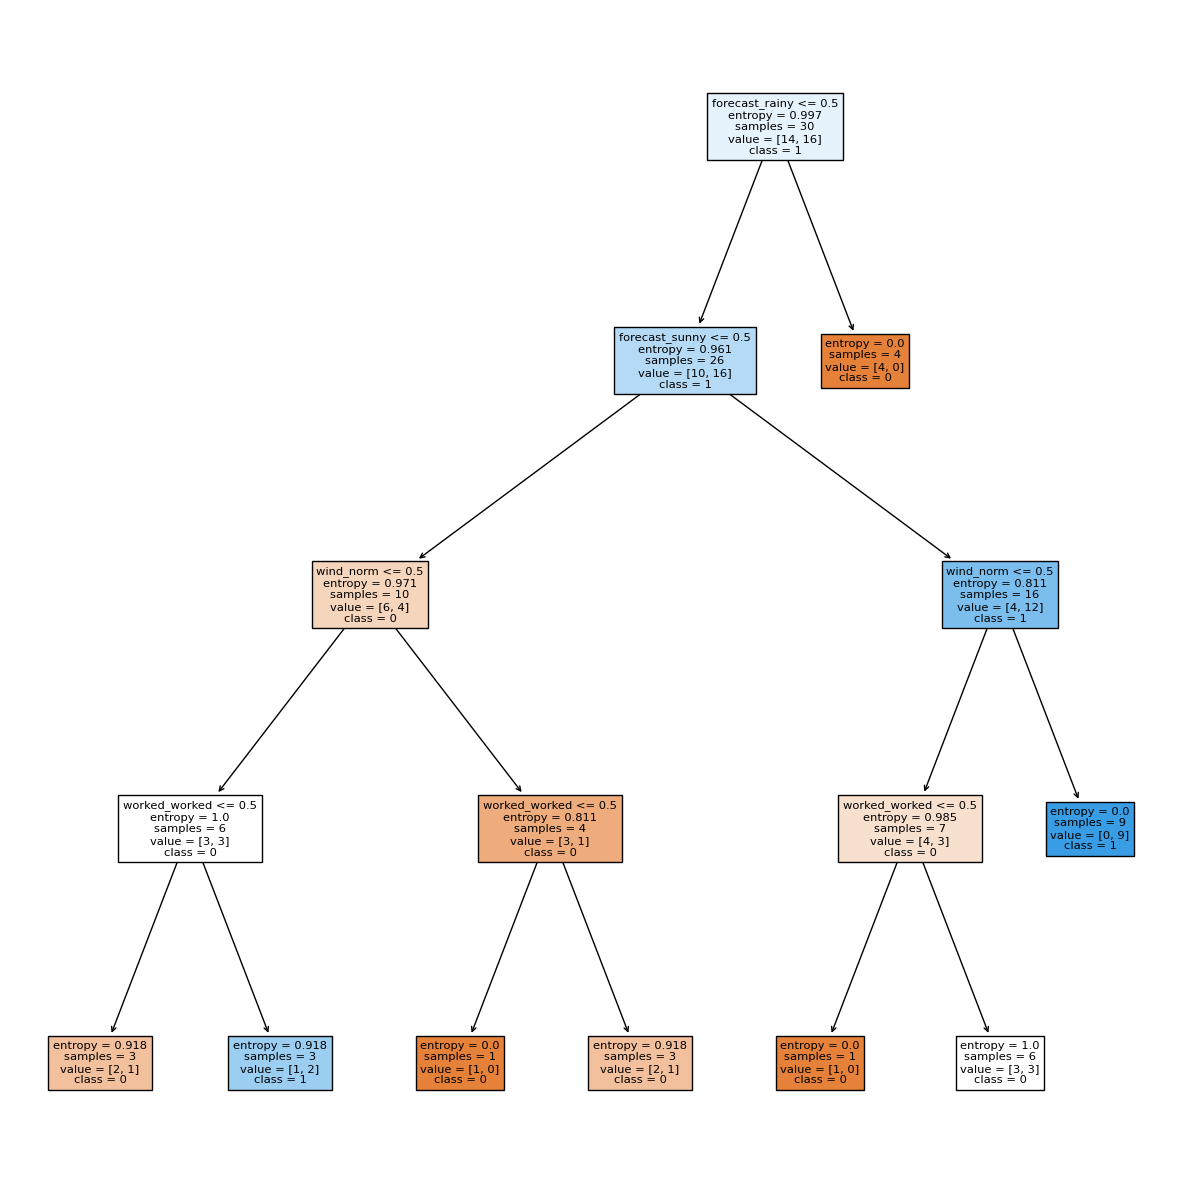

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X = pd.get_dummies(df[['forecast', 'worked', 'wind']], drop_first=True)

y = df['grilled']
y = y.map({'no': 0, 'yes': 1})

print(X.head())
print(y.head())

model = DecisionTreeClassifier(criterion='entropy', random_state=42).fit(X, y)

plt.figure(figsize=(12, 12))
tree.plot_tree(model,
              feature_names=X.columns,
              class_names='01',
              filled=True);

plt.tight_layout();

sunny, worked, and normal